In [1]:
import numpy as np

import matplotlib.pyplot as plt
import rcparams
plt.rcParams.update(rcparams.params)
plt.rcParams.update({'font.size': 12})
ringdown_colour = (0.068081, 0.391265, 0.58628)

import qnmfits

In [2]:
sim = qnmfits.SXS(ID=305, zero_time=(2,2))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


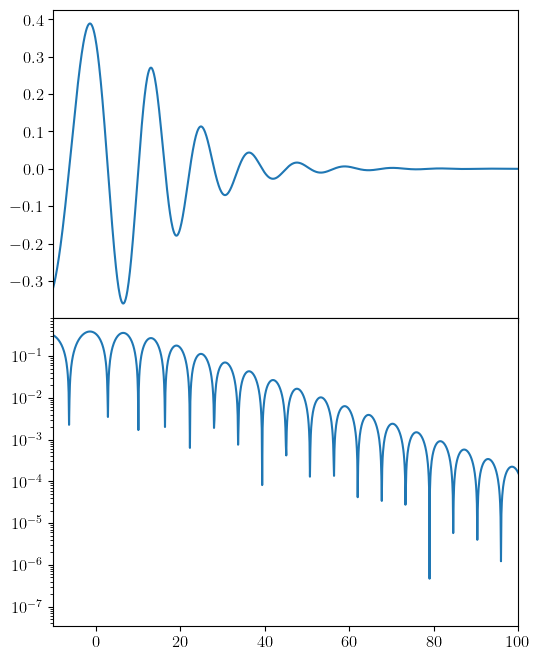

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(sim.times, np.real(sim.h[2,2]))
axs[1].plot(sim.times, abs(np.real(sim.h[2,2])))

axs[0].set_xlim(-10, 100)

axs[1].set_yscale('log')

In [4]:
best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,2],
    [(2,2,0,1)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=30
)

In [5]:
print(f"Mismatch = {best_fit['mismatch']}")

Mismatch = 2.9890940060672833e-05


In [6]:
from scipy.interpolate import interp1d

In [7]:
m = (sim.times > -20) & (sim.times < 110)
f = interp1d(sim.times[m], np.real(sim.h[2,2])[m], kind='cubic')

f_fit = interp1d(best_fit['model_times'], np.real(best_fit['model']), kind='cubic')

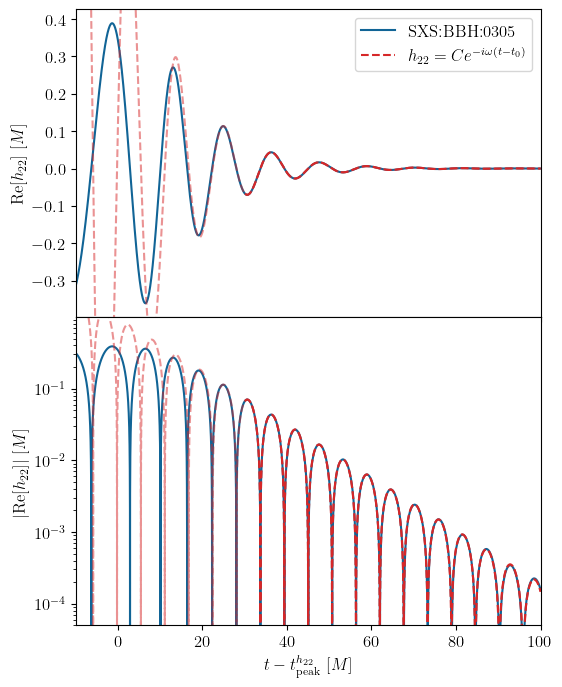

In [8]:
new_times = np.linspace(sim.times[m][0], sim.times[m][-1], 500000)
new_fit_times = np.linspace(best_fit['model_times'][0], best_fit['model_times'][-1], 500000)

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(new_times, f(new_times), c=ringdown_colour, label='SXS:BBH:0305')
axs[1].plot(new_times, abs(f(new_times)), c=ringdown_colour)

axs[0].plot(new_fit_times, f_fit(new_fit_times), c='C3', ls='--', label=r'$h_{22} = Ce^{-i\omega(t-t_0)}$')
axs[1].plot(new_fit_times, abs(f_fit(new_fit_times)), c='C3', ls='--')

extended_model = best_fit['C'][0]*np.exp(-1j*(new_times-30)*best_fit['frequencies'][0])
axs[0].plot(new_times, np.real(extended_model), c='C3', ls='--', alpha=0.5)
axs[1].plot(new_times, abs(np.real(extended_model)), c='C3', ls='--', alpha=0.5)

axs[0].legend()

axs[0].set_xlim(-10, 100)
axs[0].set_ylim((-0.3979884738603975, 0.42614283822484883))
axs[1].set_ylim(5e-5, 0.99)

axs[1].set_yscale('log')

axs[1].set_xlabel('$t - t_\mathrm{peak}^{h_{22}}\ [M]$')
axs[0].set_ylabel('$\mathrm{Re}[h_{22}]\ [M]$')
axs[1].set_ylabel('$|\mathrm{Re}[h_{22}]|\ [M]$')

fig.savefig('ringdown_waveform.pdf', bbox_inches='tight')

In [9]:
import pickle
import json

filename = 'waveform_data/SXS:BBH_ExtCCE_superrest:0305'

with open(f'{filename}.pickle', 'rb') as f:
    strain_data = pickle.load(f)
times = strain_data.pop('times')

with open(f'{filename}_metadata.json', 'r') as f:
    metadata = json.load(f)
    
sim_CCE = qnmfits.Custom(times, strain_data, metadata, zero_time=(2,2))

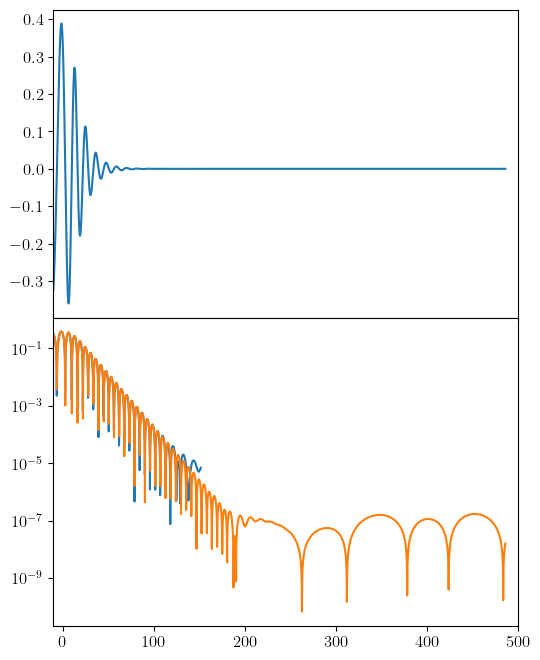

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(sim_CCE.times, np.real(sim_CCE.h[2,2]))

axs[1].plot(sim.times, abs(np.real(sim.h[2,2])))
axs[1].plot(sim_CCE.times, abs(np.real(sim_CCE.h[2,2])))

axs[0].set_xlim(-10, 500)

axs[1].set_yscale('log')

In [11]:
filename = 'waveform_data/SXS:BBH_ExtCCE_superrest:0001'

with open(f'{filename}.pickle', 'rb') as f:
    strain_data = pickle.load(f)
times = strain_data.pop('times')

with open(f'{filename}_metadata.json', 'r') as f:
    metadata = json.load(f)
    
sim_CCE = qnmfits.Custom(times, strain_data, metadata, zero_time=(2,2))

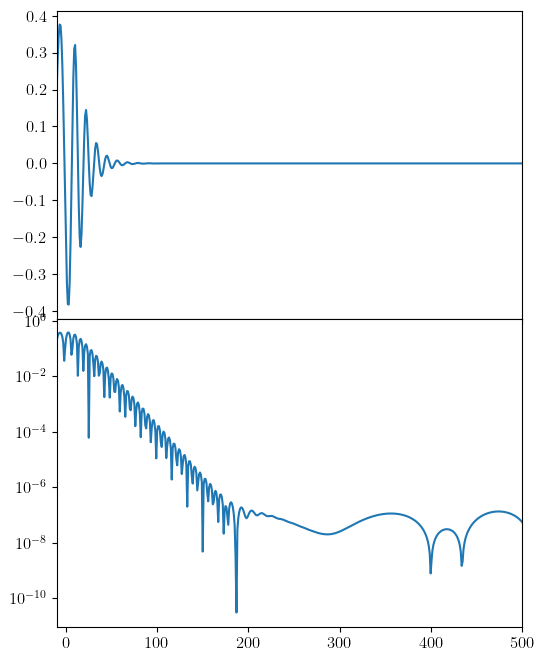

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(sim_CCE.times, np.real(sim_CCE.h[2,2]))
axs[1].plot(sim_CCE.times, abs(np.real(sim_CCE.h[2,2])))

axs[0].set_xlim(-10, 500)

axs[1].set_yscale('log')

/tmp/ipykernel_80795/650737546.py:2: RuntimeWarning: divide by zero encountered in power
  y = x**(-2)


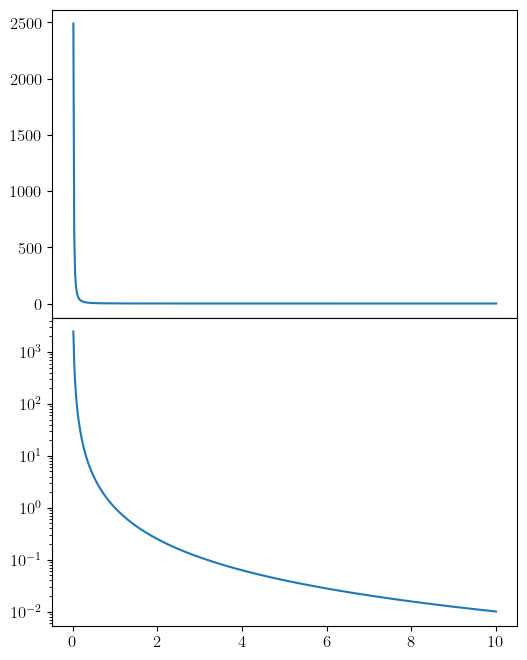

In [13]:
x = np.linspace(0,10,500)
y = x**(-2)

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(x, y)
axs[1].plot(x, y)

axs[1].set_yscale('log')